We can see how different corresponding eigenvectors are by looking at their cosine distance?

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from msmbuilder.example_datasets import AlanineDipeptide
trajs = AlanineDipeptide().get().trajectories

In [3]:
from msmbuilder.featurizer import AtomPairsFeaturizer
pairs = []
for i in range(22):
    for j in range(i):
        pairs.append((i,j))
apf = AtomPairsFeaturizer(pairs)
X = apf.fit_transform(trajs)

In [4]:
X[0].shape

(9999, 231)

In [5]:
from msmbuilder.decomposition import tICA

In [37]:
ticas = dict()
times = list(range(1,100)) + list(range(100,1000,10)) + list(range(1000,10000,1000))

for t in times:
    tica = tICA(lag_time=t)
    tica.fit(X)
    
    ticas[t] = tica

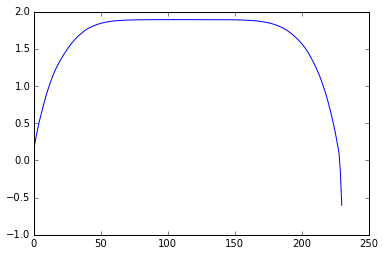

In [39]:
plt.plot(np.cumsum(tica.eigenvalues_))

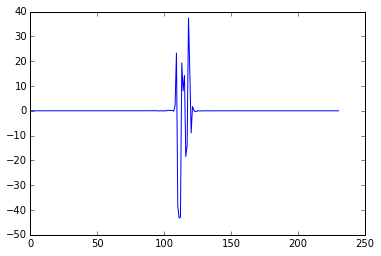

In [40]:
plt.plot(tica.eigenvectors_[0])

In [41]:
# compare leading eigenvector

dots = np.zeros((len(times),len(times)))
cos = np.zeros((len(times),len(times)))
evec = 0

from scipy.spatial.distance import cosine

for i in range(len(times)):
    for j in range(len(times)):
        evec_i = ticas[times[i]].eigenvectors_[evec]
        evec_j = ticas[times[j]].eigenvectors_[evec]
        
        dots[i,j] = np.dot(evec_i,evec_j)
        cos[i,j] = cosine(evec_i,evec_j)

/Users/joshuafass/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


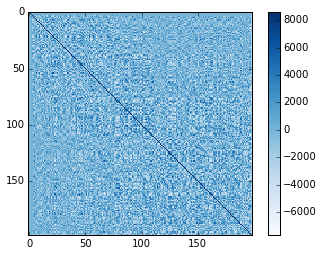

In [42]:
plt.imshow(dots,interpolation='none',cmap='Blues')
plt.colorbar()

/Users/joshuafass/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


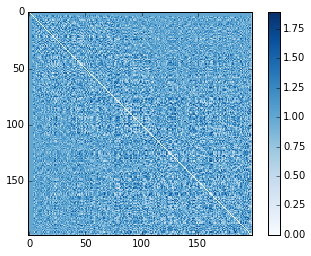

In [43]:
plt.imshow(cos,interpolation='none',cmap='Blues')
plt.colorbar()

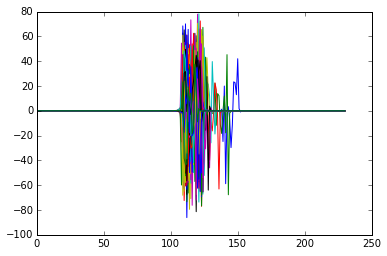

In [44]:
for t in times:
    plt.plot(ticas[t].eigenvectors_[0])

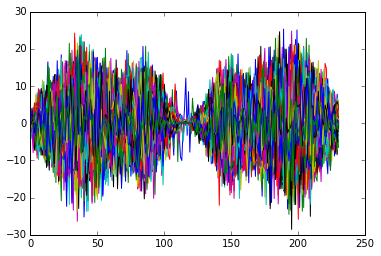

In [45]:
for t in times:
    plt.plot(ticas[t].eigenvectors_[1])

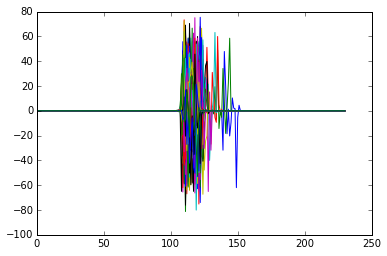

In [46]:
for t in times:
    plt.plot(ticas[t].eigenvectors_[2])

/Users/joshuafass/anaconda/lib/python3.4/site-packages/msmbuilder/decomposition/tica.py:209: RuntimeWarning: invalid value encountered in log
  return -1. * self.lag_time / np.log(self._eigenvalues_[:self.n_components])


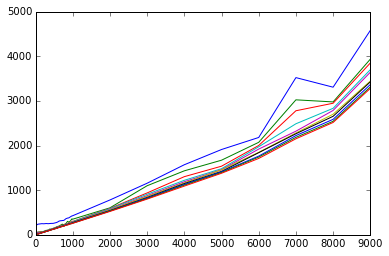

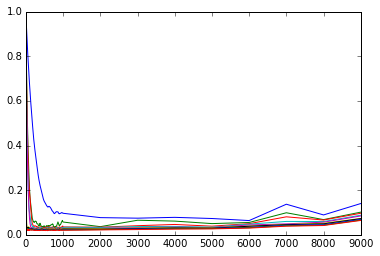

In [47]:
for i in range(10):
    plt.plot(times,[ticas[t].timescales_[i] for t in times])
    
plt.figure()
for i in range(10):
    plt.plot(times,[ticas[t].eigenvalues_[i] for t in times])

/Users/joshuafass/anaconda/lib/python3.4/site-packages/msmbuilder/decomposition/tica.py:209: RuntimeWarning: invalid value encountered in log
  return -1. * self.lag_time / np.log(self._eigenvalues_[:self.n_components])


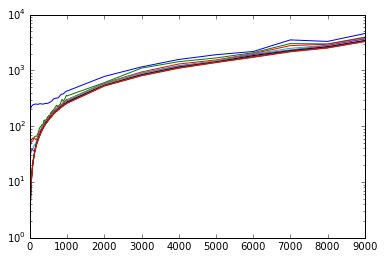

In [54]:
for i in range(10):
    plt.plot(times,[ticas[t].timescales_[i] for t in times])
plt.yscale('log')

/Users/joshuafass/anaconda/lib/python3.4/site-packages/msmbuilder/decomposition/tica.py:209: RuntimeWarning: invalid value encountered in log
  return -1. * self.lag_time / np.log(self._eigenvalues_[:self.n_components])


(1.5202645600340623, 400)

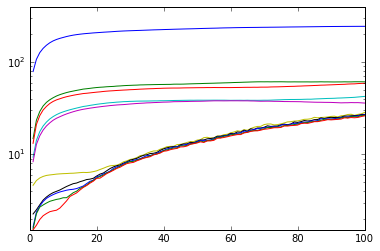

In [58]:
for i in range(10):
    plt.plot(times,[ticas[t].timescales_[i] for t in times])
plt.yscale('log')
plt.xlim(0,100)
plt.ylim(0,400)

/Users/joshuafass/anaconda/lib/python3.4/site-packages/msmbuilder/decomposition/tica.py:209: RuntimeWarning: invalid value encountered in log
  return -1. * self.lag_time / np.log(self._eigenvalues_[:self.n_components])


(0.23941465321898717, 400)

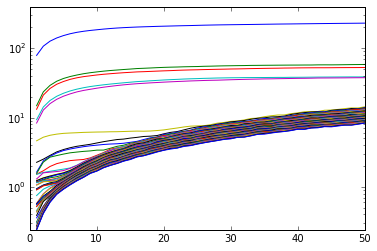

In [61]:
for i in range(50):
    plt.plot(times,[ticas[t].timescales_[i] for t in times])
plt.yscale('log')
plt.xlim(0,50)
plt.ylim(0,400)

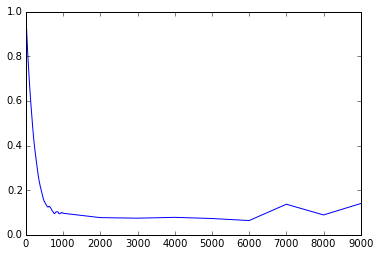

In [63]:
plt.plot(times,[ticas[t].eigenvalues_[0] for t in times])